In [ ]:
## x = [1,2,3,4,5]
x*2
for i in x :
    print(i*2)
a = np.array(x)
type(a)
a*2    #numpy 벡터단위 연산 ,벡터화연산 

In [22]:
def mySq(x):
    # print(x)
    # print('*'*50)
    return x**2
def myExp(x,n):
    return x**n

mySq(3)
myExp(3,3)

import pandas as pd 
df= pd.DataFrame({
    'a':[10,20,30],
    'b':[20,30,40]
})
df['a']**2  # a전체 제곱 
print(df['a'].apply(mySq)) #함수에 열벡터 저장해서 각각 값을 출력 
df['a'].apply(myExp,n=3)

df

def printMe(x):
    print(x)

df.apply(printMe , axis=0) #axis=0 디폴트 

def myAvg(x,y,z):
    return (x+y+z)/3

df.apply(myAvg)



0    100
1    400
2    900
Name: a, dtype: int64
0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64


TypeError: myAvg() missing 2 required positional arguments: 'y' and 'z'

In [26]:

def myAvg2(data):
    print(data[0])
    print(data[1])
    print(data[2])
    print("*"*50)
    # return (x+y+z)/3
    return (data[0]+data[1]+data[2])/3

df.apply(myAvg2)

10
20
30
**************************************************
20
30
40
**************************************************


a    20.0
b    30.0
dtype: float64

In [55]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.info()
import numpy as np 

def countMissing(v):
    # print(np.sum(pd.isnull(v)))
    nullCount = np.sum(pd.isnull(v))
    return nullCount

# titanic.apply(countMiss) # 열벡터 단위

def propMissing(v):
    n = countMissing(v)
    return n/v.size

titanic.apply(propMissing)
titanic.apply(propMissing, axis = 1)


#타이타닉 데이터 프레임에 numMissing 컬럼 추가 
#numMissing에는 행단위로 결측값의 개수가 저장 

titanic['numMissing'] = titanic.apply(countMissing, axis = 1)
titanic



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,numMissing
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,2
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [54]:

#타이타닉 데이터에서 numMissing컬럼값이 1보다 큰 모든 행 추출 
# titanic['numMissing'] = titanic.numMissing


titanic[titanic['numMissing'] > 1] .sample(10)  # 랜덤하게 10개 
# titanic.loc[titanic['numMissing'] > 1] 위와 동일
# titanic.loc[titanic['numMissing'] > 1,:] 위와 동일 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,numMissing
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True,2
560,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True,2
709,1,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False,2
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True,2
304,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2
277,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True,2
176,0,3,male,NaN,3,1,25.4667,S,Third,man,True,NaN,Southampton,no,False,2
301,1,3,male,NaN,2,0,23.2500,Q,Third,man,True,NaN,Queenstown,yes,False,2
573,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True,2
502,0,3,female,NaN,0,0,7.6292,Q,Third,woman,False,NaN,Queenstown,no,True,2


In [64]:
tips  = sns.load_dataset('tips')  # 카테고리 ~ 범주형 여러 클래스로 구분 되어짐 .. 
#string - object 
tips.info()
tips.dtypes

tips['sex_str'] = tips['sex'].astype(str)
tips.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [68]:
tips['total_bill'] = tips['total_bill'].astype(str)
tips.dtypes
tips['total_bill'] = tips['total_bill'].astype(float)
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [78]:
tipsEx = tips.head(10)
# tipsEx의 1,3,5,7,번 행의 'total_bill'컬럼값을 missing으로 변경하시오 
tipsEx.loc[[1,3,5,7],'total_bill'] = 'missing'


,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,missing,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,missing,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female
5,missing,4.71,Male,No,Sun,Dinner,4,Male
6,8.77,2.00,Male,No,Sun,Dinner,2,Male
7,missing,3.12,Male,No,Sun,Dinner,4,Male
8,15.04,1.96,Male,No,Sun,Dinner,2,Male
9,14.78,3.23,Male,No,Sun,Dinner,2,Male


In [79]:
tipsEx.info()
tipsEx    #dtype= object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  10 non-null     object  
 1   tip         10 non-null     float64 
 2   sex         10 non-null     category
 3   smoker      10 non-null     category
 4   day         10 non-null     category
 5   time        10 non-null     category
 6   size        10 non-null     int64   
 7   sex_str     10 non-null     object  
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 968.0+ bytes


In [80]:
tipsEx['total_bill'].astype(float) # 문자 + 숫자 변환x 
pd.to_numeric

ValueError: could not convert string to float: 'missing'

In [81]:
pd.to_numeric(tipsEx['total_bill'],errors='ignore')

ValueError: Unable to parse string "missing" at position 1

In [83]:
tipsEx['total_bill'] = pd.to_numeric(tipsEx['total_bill'],errors='ignore')    #에러없지만 object
tipsEx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  10 non-null     object  
 1   tip         10 non-null     float64 
 2   sex         10 non-null     category
 3   smoker      10 non-null     category
 4   day         10 non-null     category
 5   time        10 non-null     category
 6   size        10 non-null     int64   
 7   sex_str     10 non-null     object  
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 968.0+ bytes


In [85]:
tipsEx['total_bill'] = pd.to_numeric(tipsEx['total_bill'],errors='coerce') # 에러없이 float 문자 를nan
tipsEx.info()
tipsEx

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  6 non-null      float64 
 1   tip         10 non-null     float64 
 2   sex         10 non-null     category
 3   smoker      10 non-null     category
 4   day         10 non-null     category
 5   time        10 non-null     category
 6   size        10 non-null     int64   
 7   sex_str     10 non-null     object  
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 968.0+ bytes


,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,NaN,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,NaN,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female
5,NaN,4.71,Male,No,Sun,Dinner,4,Male
6,8.77,2.00,Male,No,Sun,Dinner,2,Male
7,NaN,3.12,Male,No,Sun,Dinner,4,Male
8,15.04,1.96,Male,No,Sun,Dinner,2,Male
9,14.78,3.23,Male,No,Sun,Dinner,2,Male


In [ ]:
tips['smoker'] = tips['smoker'].astype('str')
tips.info()
tips['smoker'] = tips['smoker'].astype('category')
tips.info()





In [98]:
df = pd.read_csv('gapminder.tsv' ,sep = '\t')
df
#year 단위로 그룹화 한다음 기대수명치 (lifeExp)의 평균 출력 
df.groupby(by = 'year')['lifeExp'].mean()
aleby = df.groupby('year').lifeExp.mean()

#df 에서 year열에 대해 유일한 값만 추출 
df['year'].unique()
df.year.unique()

#set 집합 
set(df.year)


#df에서year가 1952년도인 모든 자료 출력 
df[df['year'] =='1952']
df.loc[df.year == 1952]
y1952 = df.loc[df.year == 1952,:]
y1952Mean = y1952['lifeExp'].mean()     # y1952.lifeExp.mean() 

In [102]:
y1957 = df.loc[df.year == 1957,:]
y1957Mean = y1957['lifeExp'].mean()

y1962 = df.loc[df.year == 1962,:]
y1962Mean = y1962['lifeExp'].mean()

y2007 = df.loc[df.year == 2007,:]
y2007Mean = y2007['lifeExp'].mean()

In [120]:
y1952Mean
y2007Mean
y1957

,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
13,Albania,Europe,1957,59.280,1476505,1942.284244
25,Algeria,Africa,1957,45.685,10270856,3013.976023
37,Angola,Africa,1957,31.999,4561361,3827.940465
49,Argentina,Americas,1957,64.399,19610538,6856.856212
...,...,...,...,...,...,...
1645,Vietnam,Asia,1957,42.887,28998543,676.285448
1657,West Bank and Gaza,Asia,1957,45.671,1070439,1827.067742
1669,"Yemen, Rep.",Asia,1957,33.970,5498090,804.830455
1681,Zambia,Africa,1957,44.077,3016000,1311.956766


In [106]:
pd.DataFrame({
    'year':[1952,1957,1962,2007],
    'avg':[y1952Mean,y1957Mean,y1962Mean,y2007Mean]
})

,year,avg
0,1952,49.057620
1,1957,51.507401
2,1962,53.609249
3,2007,67.007423


In [118]:
def myMean(v):
    n = len(v)
    s = 0
    for value in v :
        s += value
    return s/n

#연도 단위로 기대수명치의 평균 출력 (myMean함수 사용)
# df.groupby('year').lifeExp.apply(myMean)    #내가만든함수 
df.groupby('year').lifeExp.agg([np.mean])    # 이미만들어진 함수 
df.groupby('year').lifeExp.agg([np.mean,np.std,np.count_nonzero]) #여러개 함수 가능 

,mean,std,count_nonzero
year,,,
1952,49.057620,12.225956,142.0
1957,51.507401,12.231286,142.0
1962,53.609249,12.097245,142.0
1967,55.678290,11.718858,142.0
1972,57.647386,11.381953,142.0
1977,59.570157,11.227229,142.0
1982,61.533197,10.770618,142.0
1987,63.212613,10.556285,142.0
1992,64.160338,11.227380,142.0


In [129]:
from datetime import datetime
datetime.now()

t1 = datetime.today()
t2 = datetime(1995,5,1)
t3 = datetime(1970,12,12,13,13,20)

t1 - t2    # 날짜도 수치형식 

datetime.timedelta(days=9180, seconds=44340, microseconds=404831)

In [127]:
t3

datetime.datetime(1970, 12, 12, 13, 13, 20)

In [133]:
ebola = pd.read_csv('country_timeseries.csv')
ebola.info()
ebola['Date'] = pd.to_datetime(ebola['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [134]:
ebola = pd.read_csv('country_timeseries.csv',parse_dates=['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [135]:
# '06/18/20'
# pd.to_datetime('06/18/20')
pd.to_datetime('06/20/18')
d1 = pd.to_datetime('06/20/18',format="%m/%y/%d")
d1.year
d1.month
d1.day

18

In [ ]:
ebola = pd.read_csv('country_timeseries.csv')
ebola['dateDt'] = pd.to_datetime(ebola['Date'])
ebola[['Date','dateDt']]

# ebola['Date'][0].year  #object 타입 에러 
ebola['dateDt'][0].year

In [ ]:
ebola['dateDt'].dt.month   # dt의 이유 seriese는 속성전체 안됨.month X 특정 날짜의 속성을하려면dt 
ebola['dateDt'].dt.day


In [ ]:
ebola['month'],ebola['day'] = ebola['dateDt'].dt.month,ebola['dateDt'].dt.day
ebola.info()

In [ ]:
ebola.tail(5)
ebola.loc[[117,118,119,120,121]]
ebola.loc[117:,]
ebola.iloc[-5:,:5]  # 원하는 행 추출 

In [ ]:
ebola['dateDt'].min()   #가장오래된날짜   날짜형식도 수치 = 수치 최소값min
ebola['dateDt'] - ebola['dateDt'].min() #발병일 이후 몇일이 지낫나?



In [140]:
bank = pd.read_csv('banklist.csv')
bank
bank.info()

banks = pd.read_csv('banklist.csv',parse_dates=[5,6])  # 인덱스 번호도 가능
bank.info()

banks['Closing Date'].dt.year 
banks['Closing Date'].dt.quarter  # 분기별 

banks['Closing_year'],banks['Closing_quarter'] =banks['Closing Date'].dt.year ,banks['Closing Date'].dt.quarter
banks['Closing_year']


#몊년도에 파산한 은행이 제일 많을까 ?
Closing_year = banks.groupby(['Closing_year']).size()
banks['Closing_year'].value_counts()#내림차순 정렬

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                  

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2017      8
2015      8
2016      5
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing_year, dtype: int64

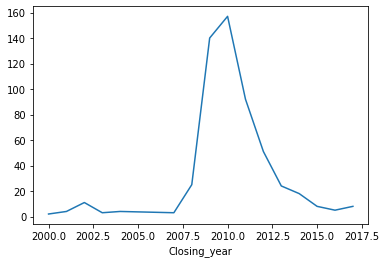

In [146]:
Closing_yearQ = banks.groupby(['Closing_year','Closing_quarter']).size()
import matplotlib.pyplot as plt 

Closing_year.plot()

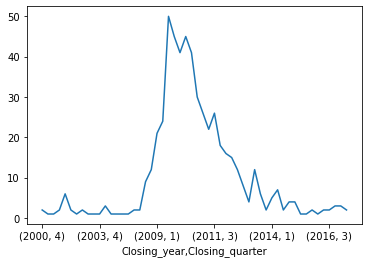

In [145]:
Closing_yearQ.plot()

In [ ]:
모델을 만들어보고 예측결과를 submission

training set (train.csv) 모델 데이터 
test set (test.csv) 테스트데이터

기존에 있는 변수로 부터 새로운 변수를 만드는것  = feature engineering 
 gender_submission.csv제출파일 
 #= 명수 
#kaggle.com
 트레이니 데이터 -> 알고리즘 - > 모델 ->예측결과출력
테스트 데이터 -------------------> 입력 


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape #(891,12)
test.shape #(418,11)
train.head()
pd.read_csv('gender_submission.csv')

train.describe() #기술통계
test.describe()
train.info()
train.groupby('Sex')['Survived'].mean()
train.pivot_table(index=['Sex'],values=['Survived'], aggfunc =np.mean )#집계함수
train.pivot_table(index=['Sex'],values=['Survived'] )#집계함수 디폴트 = aggfunc = np.mean
train.pivot_table(index=['Sex'])
train.groupby('Sex')['Survived'].sum()   # 생존자수 
train.groupby('Sex')['Survived'].describe()
# 성별,선실등급별 생존율
train.groupby(['Sex','Pclass'])['Survived'].mean()

train.pivot_table('Survived',['Sex','Pclass'],aggfunc = np.mean)
# train.pivot_table(index=['Sex','Pclass'])

#EDA과정 탐색적 데이터 분석 

#모델링 
test['Survived']=test.Sex=='female'

test.head()
test['Survived'].value_counts()
submission = test[['PassengerId','Survived']].copy()
submission.head()

submission['Survived'] = submission['Survived'].astype(int)
submission.head()

submission.to_csv('submission.csv',index=False)
